Back to the main [Index](../index.ipynb)

#### Version information

In [5]:
%matplotlib inline
from __future__ import print_function
import tellurium as te

# to get the tellurium version use
print(te.getTelluriumVersion())

# to print the full version info use
print('-' * 80)
te.printVersionInfo()
print('-' * 80)

1.3.0
--------------------------------------------------------------------------------
tellurium : 1.3.0
roadrunner : 1.4.2; Compiler: gcc 4.8.4, C++ version: 199711; JIT Compiler: LLVM-3.4; Date: Feb  4 2016, 11:44:01; LibSBML Version: 5.12.0
antimony : v2.8.0
snbw_viewer : No information for sbnw viewer
libsbml : 5.12.1
libsedml : 401
phrasedml : v0.5 beta
--------------------------------------------------------------------------------


#### Repeat simulation without notification

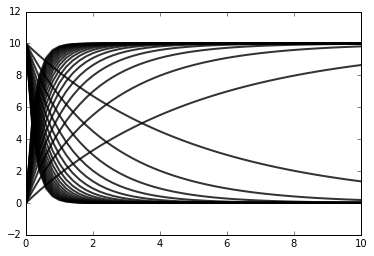

In [2]:
# Load SBML file
r = te.loada("""
model test
    J0: X0 -> X1; k1*X0;
    X0 = 10; X1=0;
    k1 = 0.2
end
""")

import matplotlib.pyplot as plt

# Turn of notices so they don't clutter the output
te.noticesOff()
for i in xrange(0, 20):
    result = r.simulate (0, 10)
    r.reset()
    r.plot(result, loc=None, show=False, 
           linewidth=2.0, linestyle='-', color='black', alpha=0.8)
    r.k1 = r.k1 + 0.2
# Turn the notices back on
te.noticesOn()

#### File helpers for reading and writing

In [3]:
# create tmp file
import tempfile
ftmp = tempfile.NamedTemporaryFile(suffix=".xml")
print(ftmp.name)
# load model
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
# save to file
te.saveToFile(ftmp.name, r.getMatlab())

# or easier via
r.exportToMatlab(ftmp.name)

# load file
sbmlstr = te.readFromFile(ftmp.name)
print(sbmlstr)

/tmp/tmpQKglWS.xml

